# Visually check if the generated data looks right

In [1]:
import pickle
import random

from keras import models
import numpy as np
import pandas as pd

import settings
import training

%matplotlib inline

Using Theano backend.


In [2]:
store = pd.HDFStore('data.hdf')

In [3]:
with open('model.pickle', 'rb') as f:
    clf = pickle.load(f)

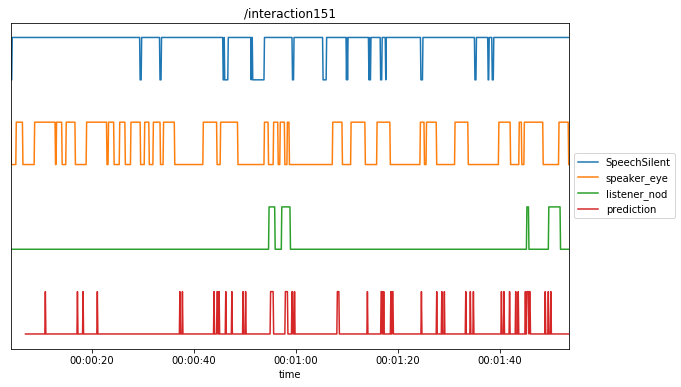

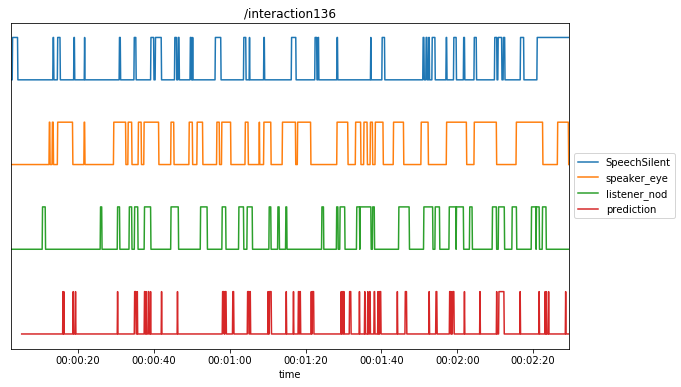

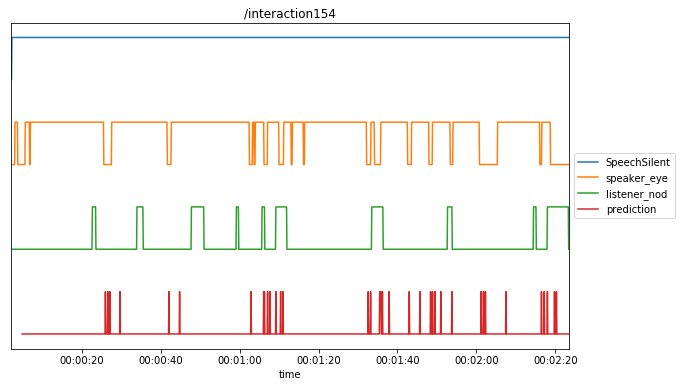

In [4]:
for key in random.sample(store.keys(), 3):
    df = training.prepare_interaction(store[key])
    samples = training.to_samples(df, n=settings.WINDOW_SIZE)
    X = samples[:, :-1]
    
    yhat = clf.predict(X)
    
    df['prediction'] = np.nan
    df.loc[-len(yhat):, 'prediction'] = yhat
    
    training.plot_data(df, title=key)

In [5]:
model = models.load_model('model_lstm.hdf')

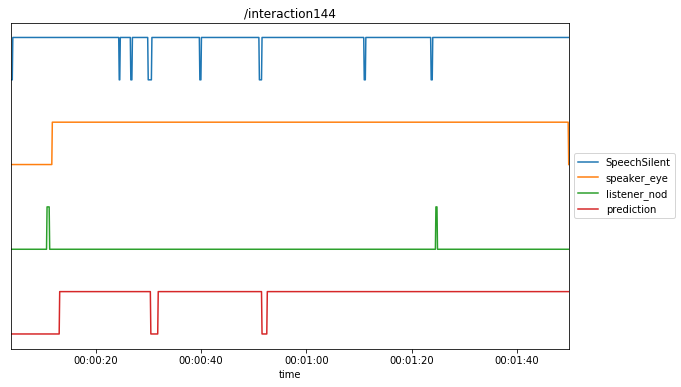

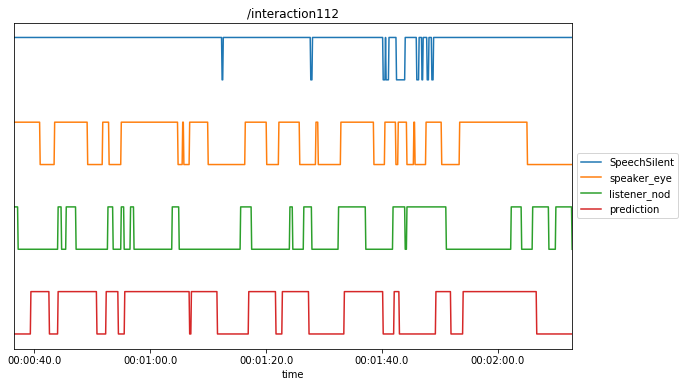

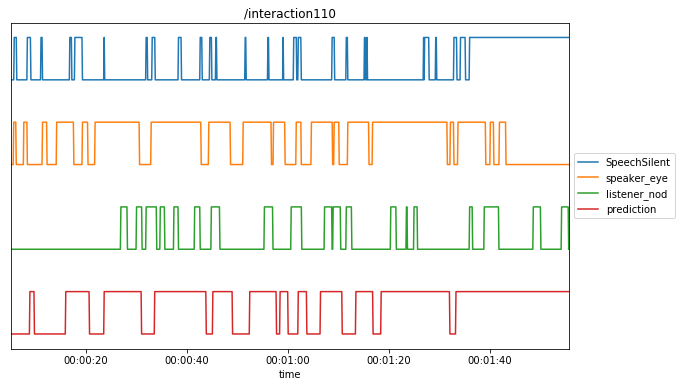

In [6]:
for key in random.sample(store.keys(), 3):
    df = training.prepare_interaction(store[key])
    
    yhat = np.zeros(len(df))
    
    for i in range(len(df) - settings.WINDOW_SIZE + 1):
        x = df.values[np.newaxis, i:i + settings.WINDOW_SIZE, :-1]
        yhat[i + settings.WINDOW_SIZE - 1] = model.predict(x)[0 ,1]
    
    df['prediction'] = yhat > yhat.mean()
    
    training.plot_data(df, title=key)